In [1]:
from PIL import Image
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
transform = A.Compose([
    A.Resize(width=1920,height=1080),
    A.RandomCrop(width=1280,height=720),
#     A.Rotate(limit=40,p=0.9, border_mode=cv2.BORDER_CONSTANT),
    A.Rotate(limit=40, p=0.9),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RGBShift(r_shift_limit=25,g_shift_limit=25,b_shift_limit=25, p=0.9),
    A.OneOf([
        A.Blur(blur_limit=3, p=0.5),
        A.ColorJitter(p=0.5),
    ], p=0.1),
    
])

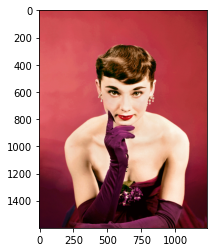

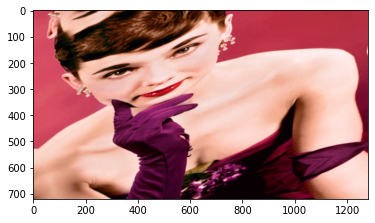

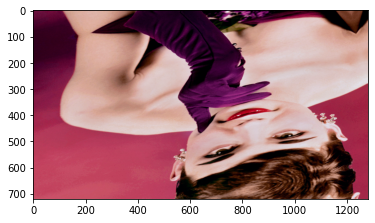

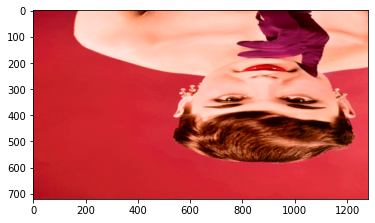

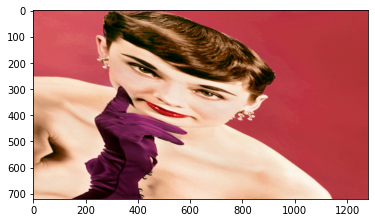

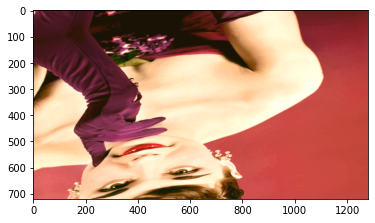

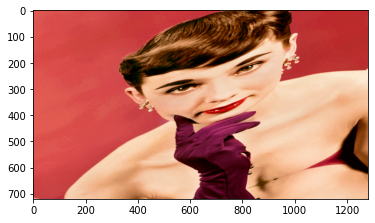

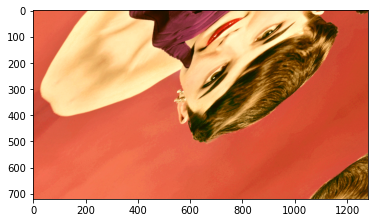

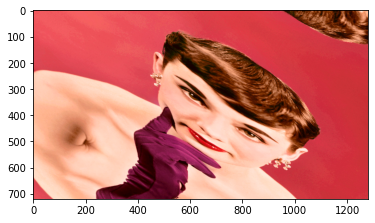

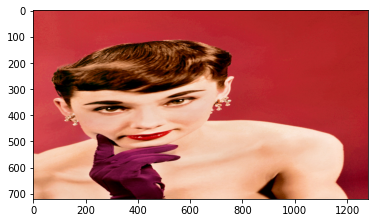

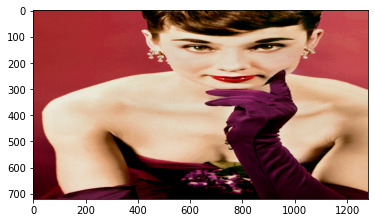

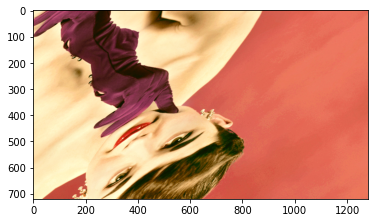

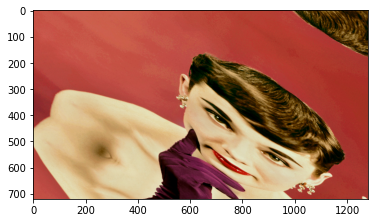

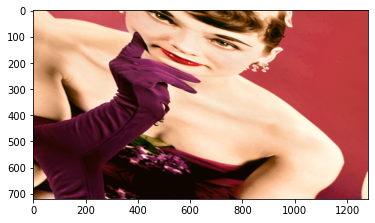

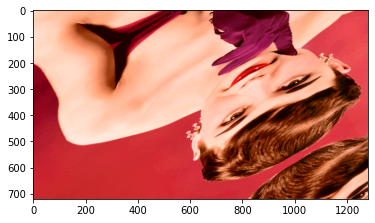

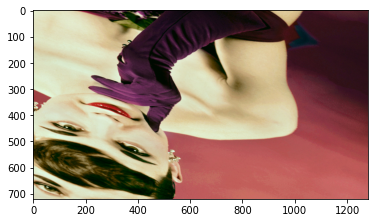

In [3]:
%matplotlib inline

img = Image.open("../input/famous-iconic-women/output/train/Audrey Hepburn/000010.jpg")

imagelist = [img]
image = np.array(img)

for i in range(4):
    aug_image = transform(image=image)
    imagelist.append(aug_image["image"])

for i in range(len(imagelist)):
    plt.imshow(imagelist[i])
    plt.show()

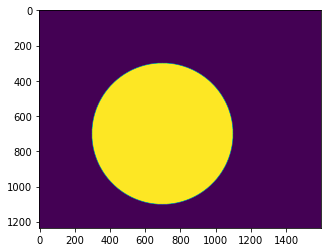

In [4]:
# applying a mask

# masks will also have the same transformations applied

mask = np.zeros(shape=img.size)
mask = cv2.circle(mask, (700,700), 400,400,-1)

plt.imshow(mask)
plt.show()

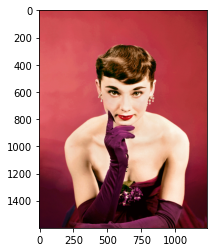

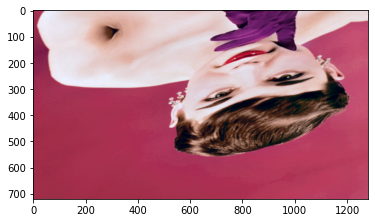

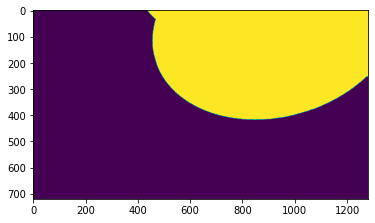

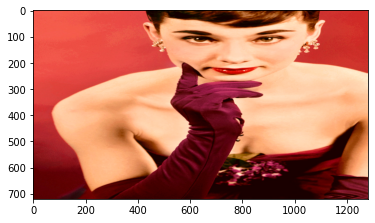

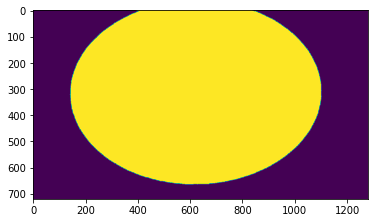

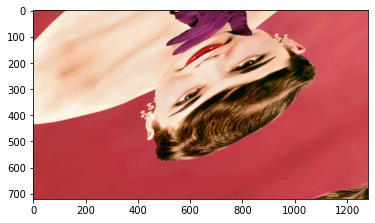

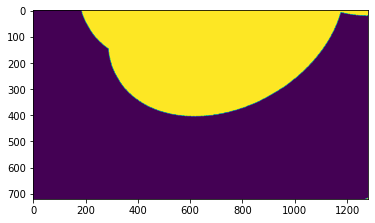

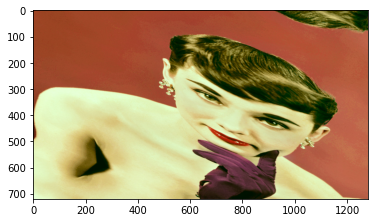

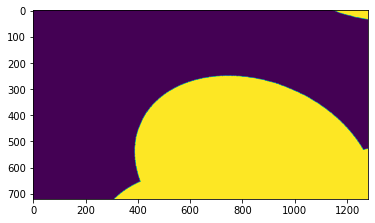

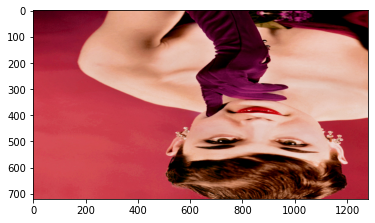

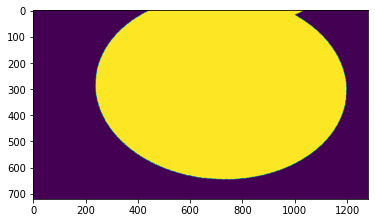

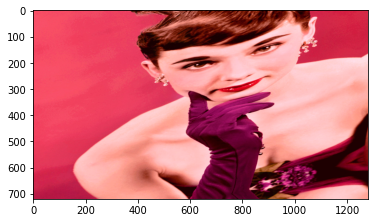

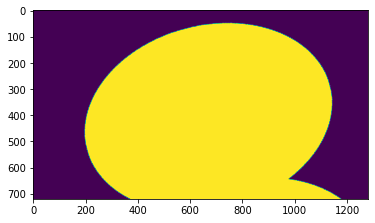

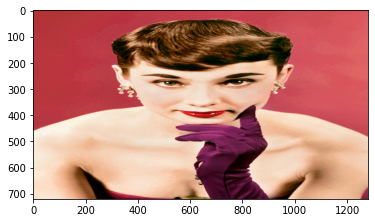

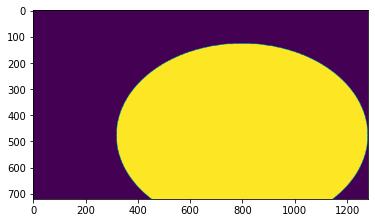

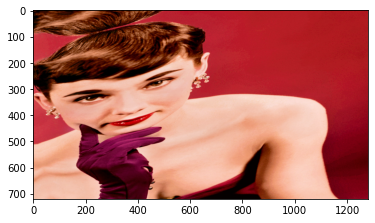

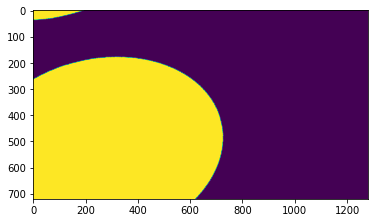

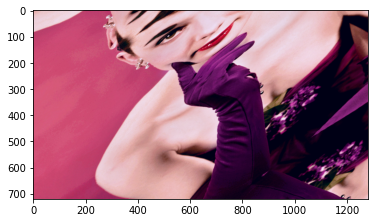

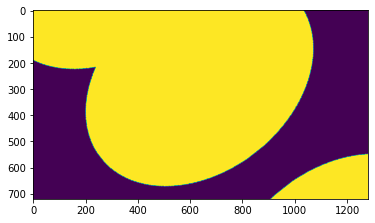

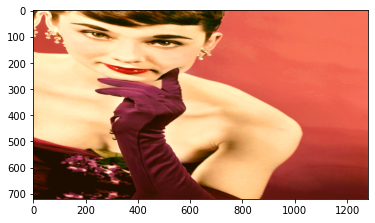

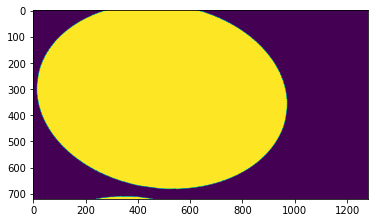

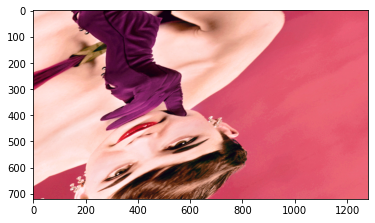

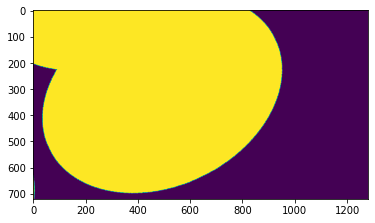

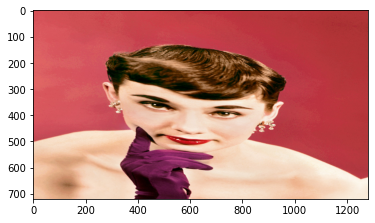

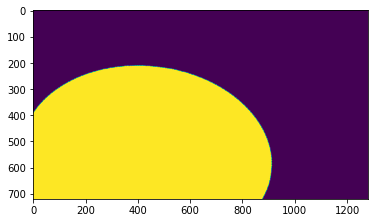

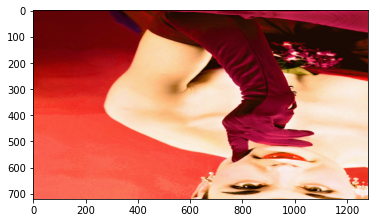

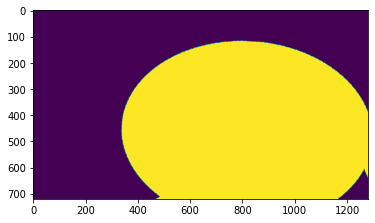

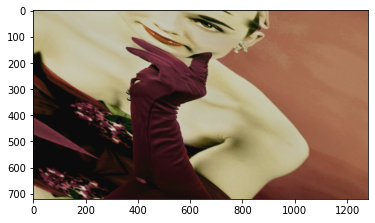

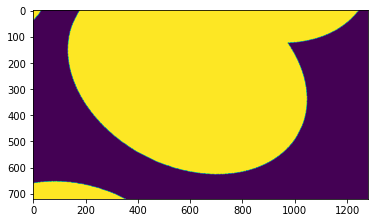

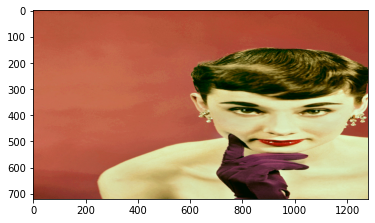

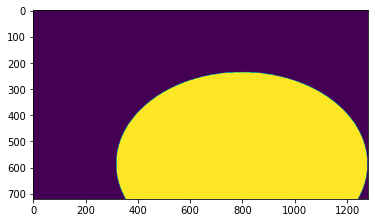

In [5]:
# mask = np.array(mask)
# imagelist = [image]
# for i in range(15):
#     aug_image = transform(image=image, masks=[mask])
#     imagelist.append(aug_image["image"])
#     imagelist.append(aug_image["masks"][0])

# for i in range(len(imagelist)):
#     plt.imshow(imagelist[i])
#     plt.show()
    

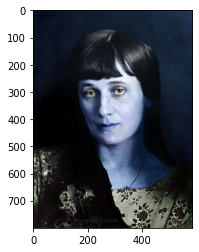

In [10]:
# adding bounding boxes
bounding_image = cv2.imread("../input/famous-iconic-women/output/train/Anna Akhmatova/000001.jpg")
plt.imshow(bounding_image)

# she looks like a beautiful vampire!

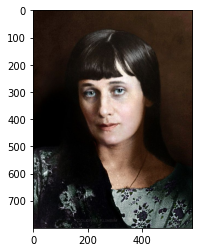

In [11]:
bounding_image = cv2.cvtColor(bounding_image, cv2.COLOR_BGR2RGB)
plt.imshow(bounding_image)

In [17]:
# creating a random number guessing game

import random

the_number = random.randint(1,10)
# print(the_number)

game_over = False
while(game_over==False):
    guess = int(input("Enter a number: "))
    if(guess<the_number):
        print("The guess is too low.")
    elif(guess>the_number):
        print("The guess is too high. ")
    else:
        print("Correct guess")
        game_over = True

7


Enter a number:  4


The guess is too low.


Enter a number:  9


The guess is too high. 


Enter a number:  7


Correct guess


In [29]:
bboxes = [[13, 170, 224, 410]]

In [30]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0),
    ], bbox_params=A.BboxParams(format="pascal_voc", min_area=2048,
                                min_visibility=0.3, label_fields=[])
)

In [31]:
images_list = [bounding_image]
saved_bboxes = [bboxes[0]]
for i in range(15):
    augmentations = transform(image=bounding_image, bboxes=bboxes)
    augmented_img = augmentations["image"]

    if len(augmentations["bboxes"]) == 0:
        continue

    images_list.append(augmented_img)
    saved_bboxes.append(augmentations["bboxes"][0])

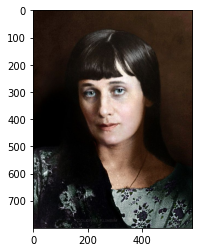

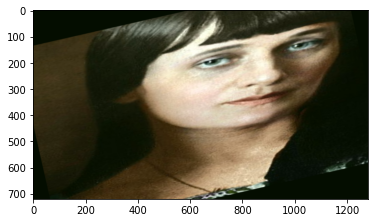

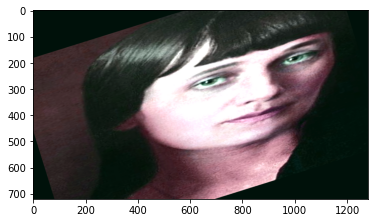

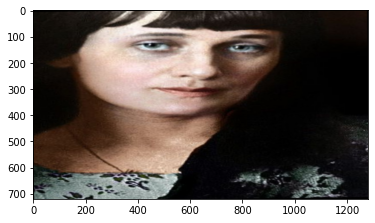

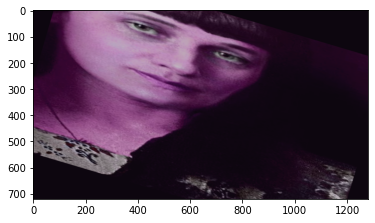

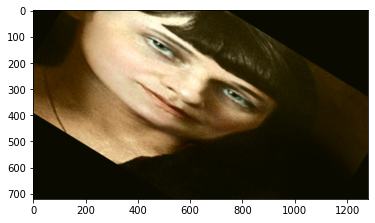

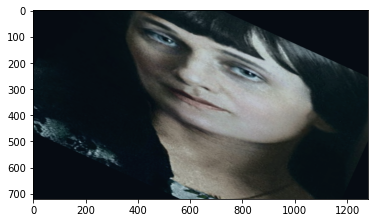

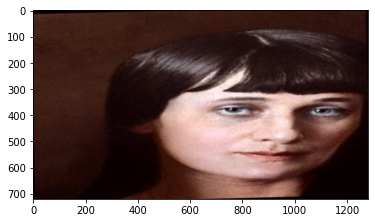

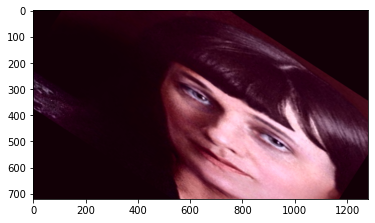

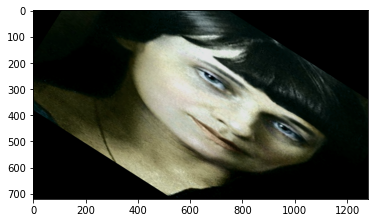

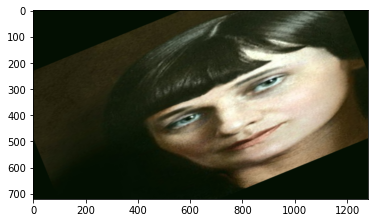

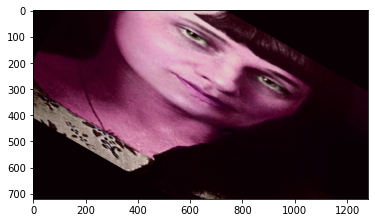

In [32]:
for i in range(len(images_list)):
    plt.imshow(images_list[i])
    plt.show()